<a href="https://colab.research.google.com/github/CarlosTadeuVassoler/IA/blob/main/Exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento de uma rede neural para a aplicação de regressões lineares
  
  A seguir, foi representado o procedimento que inclui: criação de dados aleatórios; treinamento do modelo; avaliação dos resultados. Foi utilizada linguagem Python para a confecção dos códigos, a biblioteca PyTorch para as operações com inteligência artificial e o Matplotlib para visualização dos dados. A lógica do ML/DL consistiu em: gerar um modelo aleatório; ajustar seus parâmetros até que eles representassem bem os dados.
* O primeiro passo foi importar as bibliotecas a serem utilizadas.



In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

* Em seguida, foi estabelecida a lógica que permite trabalhar tanto com "CPU" quanto "GPU", quando disponível, utilizando a prática de dispositivos agnósticos.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Geração de dados

* Para a geração de dados, utilizou-se primeiramente uma reta com equação y = aX + b.
* Foram estabelecidos valores para x variando de 0 a 1 com um passo de 0.02, bem como os parâmetros a (weight) = 0.7 e b (bias) = 0.3.
* Criaram-se tensors para X e y com os valores e a equação mencionada, e foi aplicada certa aleatoriedade para os valores de Y.

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
y = (bias + weight * X)

torch.manual_seed(42)
aleatorio = torch.rand(50, 1).to(device)
y += aleatorio / 10

* Entre os dados gerados, selecionou-se 80% para o treinamento do modelo e 20% para os testes dos resultados.

In [ ]:
elementos_treino = int(0.8 * len(X))
X_treino, y_treino = X[:elementos_treino], y[:elementos_treino]
X_teste, y_teste = X[elementos_treino:], y[elementos_treino:]

## Visualização dos dados

* A fim de visualizar os dados criados, criou-se uma função que plota y em função de X

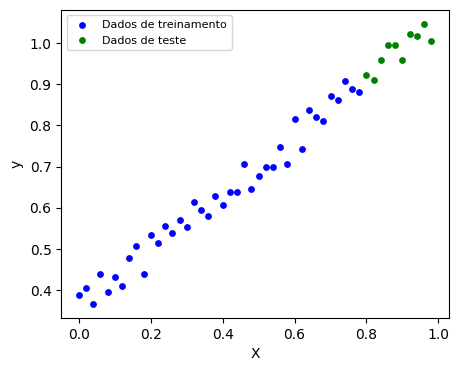

In [ ]:
def plotar_dados(treino_x=X_treino, treino_y=y_treino, teste_x=X_teste, teste_y=y_teste, eixo_x=X, previsoes=None, completa=None):
  plt.figure(figsize=(5, 4))
  plt.scatter(treino_x.to("cpu"), treino_y.to("cpu"), c="blue", s=15, label="Dados de treinamento")
  plt.scatter(teste_x.to("cpu"), teste_y.to("cpu"), c="green", s=15, label="Dados de teste")
  plt.ylabel("y")
  plt.xlabel("X")

  if previsoes is not None:
    plt.scatter(teste_x.to("cpu"), previsoes.to("cpu"), c="red", s=15, label="Previsões do modelo")

  if completa is not None:
    plt.plot(eixo_x.to("cpu"), completa.to("cpu"), c="black", label="Regressão Completa")

  plt.legend(prop={"size": 8})

plotar_dados()

## Criando o modelo

* Foi criado um objeto para o modelo que herda as propriedades da classe mãe nn.Module, inicializa os parâmetros utilizando nn.Linear e os aplica para gerar um tensor y a partir de uma entrada x.

In [ ]:
class ModeloRegressaoLinear(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear_layer(x)

* A fim de garantir a reprodutibilidade dos resultados obtidos, fixou-se a seed para a geração de números aleatórios.
* Foi criado um objeto para o modelo a ser treinado.

In [ ]:
torch.manual_seed(42)
modelo_0 = ModeloRegressaoLinear().to(device)

* Os parâmetros gerados pelo modelo são aleatórios e devem ser ajustados durante o treinamento.
* Inicialmente, eles fornecem a previsão representada abaixo.

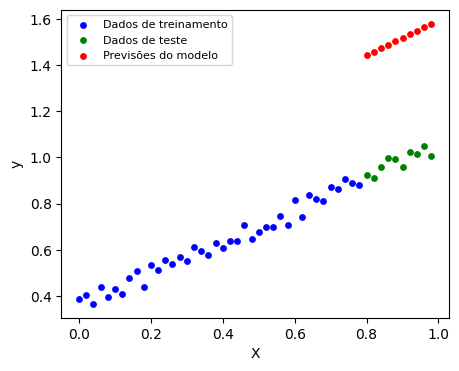

In [ ]:
with torch.inference_mode():
  y_prevs = modelo_0(X_teste)

plotar_dados(previsoes=y_prevs)

## Treinando o Modelo

* Para o treinamento, selecionou-se como função de perda o erro absoluto médio (MAE) e como otimizador o gradient descent (SGD), com taxa de aprendizado igual a 0.01.

In [ ]:
erro_absoluto_medio = nn.L1Loss()
otimizador = torch.optim.SGD(params=modelo_0.parameters(), lr=0.01)

Os passos para o treinamento, após colocar o modelo em modo de treinamento, são:
- Calcular as previsões para os parâmetros atuais;
- Verificar o quão erradas estão tais previsões;
- Armazenar o gradiente atual de cada parâmetro;
- Atualizar os parâmetros de acordo com os gradientes salvos.

Uma vez finalizado este loop, desativa-se o modo de treino.

In [ ]:
modelo_0.train()

for _ in range(200):
  y_prevs = modelo_0(X_treino)
  loss = erro_absoluto_medio(y_prevs, y_treino)
  otimizador.zero_grad()
  loss.backward()
  otimizador.step()

modelo_0.eval()

* Após o treinamento da rede neural, as previsões obtidas foram representadas abaixo.

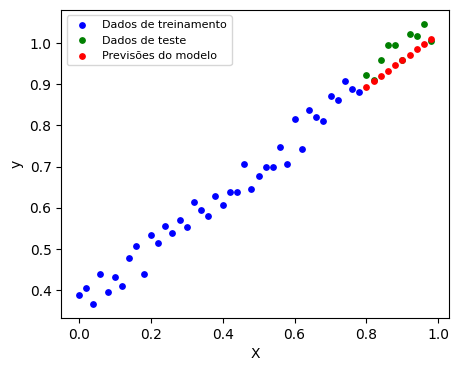

In [ ]:
with torch.inference_mode():
  y_prevs = modelo_0(X_teste)

plotar_dados(previsoes=y_prevs)

* Por fim, uma vez que a previsão gerada pelo modelo representou bem o comportamento dos dados selecionados para o teste, finalizou-se o treinamento da rede neural.
* A regressão linear final dos dados foi representada abaixo.

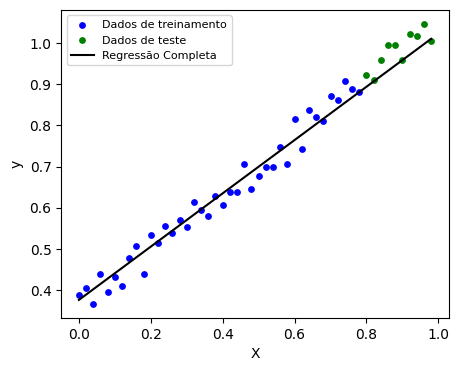

In [ ]:
with torch.inference_mode():
  completa = modelo_0(X)

plotar_dados(completa=completa)